# IIND-4103 ANÁLISIS DE SERIES DE TIEMPO 
# Introduccion a Series de tiempo e Inferencia estadistica

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

En esta actividad vamos a ver una breve introducción al análisis de series de tiempo, repasado conceptos de inferencia estadistica, regresión lineal por mínimos cuadrados ordinarios y auto-correlación residual. 

## Actividad en grupos
### Nombres: Daniel Moreno, Daniel Rassa, Sebastián Martinez, Daniela Rodríguez

**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.



Primero instalemos los paquetes que vamos a utilizar a lo largo de esta actividad

In [25]:
# Declaramos el paquete "faraway"
library(faraway)
#install.packages("faraway")
# si no encontramos el paquete "faraway", lo podemos instalar mediante el comando 
#pacman::p_load(faraway)

# Nota: si no tiene instalado "pacman", lo podemos instalar mediante 
#install.packages("pacman")

# 1. Inferencia estadística

##  Ejemplo CO2

Veamos un problema de regresion lineal con datos de concentracion de CO2. 

Examinemos los datos a continuación:

In [26]:
help(co2)

co2 {datasets},R Documentation


In [2]:
data=co2
head(data)

[1] 315.42 316.31 316.50 317.56 318.13 318.00

La serie de "co2" es un objeto de tipo "serie de tiempo" (ts), es decir, son datos que ocurren en momentos del tiempo con cierta periodicidad.

In [28]:
class(data)

[1] "ts"

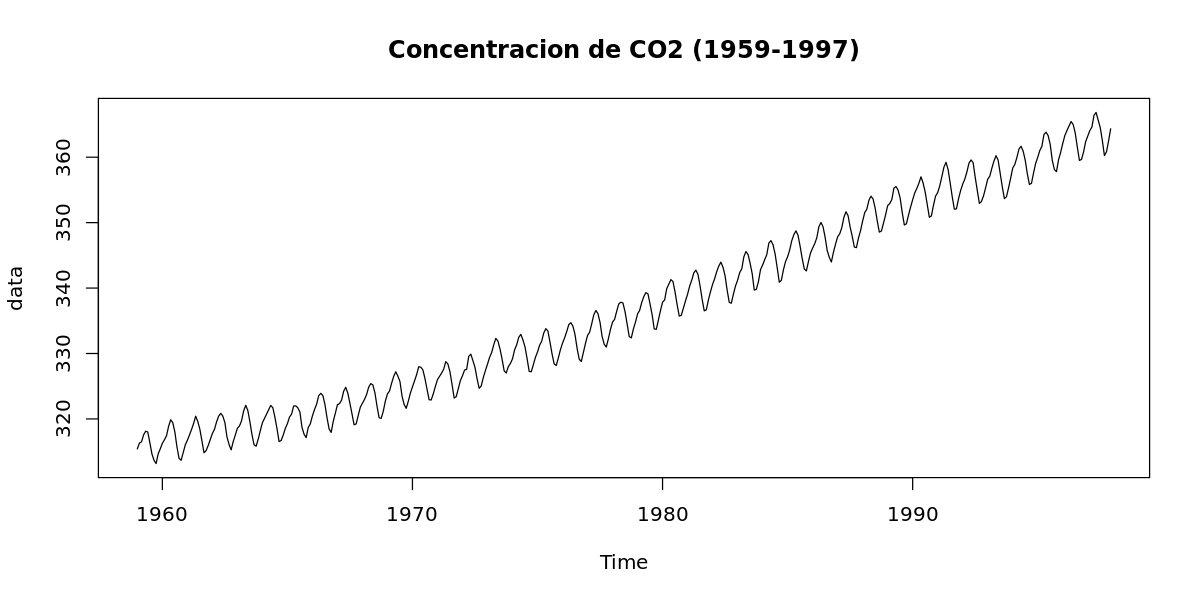

In [29]:
# Grafiquemos los datos: ¿qué puede observar en la gráfica?
options(repr.plot.width=10, repr.plot.height=5)
plot(data, main="Concentracion de CO2 (1959-1997)")

### Ejercicio 1.1

Estime la tendencia de la concentración de CO2 a lo largo del tiempo

In [3]:
# Calculemos los coeficientes del modelo de regresión lineal "a mano"
co2.val = as.numeric(co2)
co2.t = as.numeric( time(co2) )
SSxx = sum( (co2.t - mean(co2.t) ) * (co2.t - mean(co2.t) ) )
SSxy = sum( (co2.val - mean(co2.val) ) * (co2.t - mean(co2.t) ) )
# complete las siguientes dos lineas de codigo
pendiente = SSxy/SSxx       
intercepto =mean(co2.val)-pendiente*mean(co2.t)

cat('La pendiente es igual a: ', pendiente)

cat('\nEl intercepto es igual a: ', intercepto)


La pendiente es igual a:  1.307497
El intercepto es igual a:  -2249.774

In [31]:
# Ahora mediante la funcion de R
# complete la siguiente linea de codigo
co2_reg = lm(co2 ~ co2.t)

summary(co2_reg)


Call:
lm(formula = co2 ~ co2.t)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0399 -1.9476 -0.0017  1.9113  6.5149 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.250e+03  2.127e+01  -105.8   <2e-16 ***
co2.t        1.308e+00  1.075e-02   121.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.618 on 466 degrees of freedom
Multiple R-squared:  0.9695,	Adjusted R-squared:  0.9694 
F-statistic: 1.479e+04 on 1 and 466 DF,  p-value: < 2.2e-16


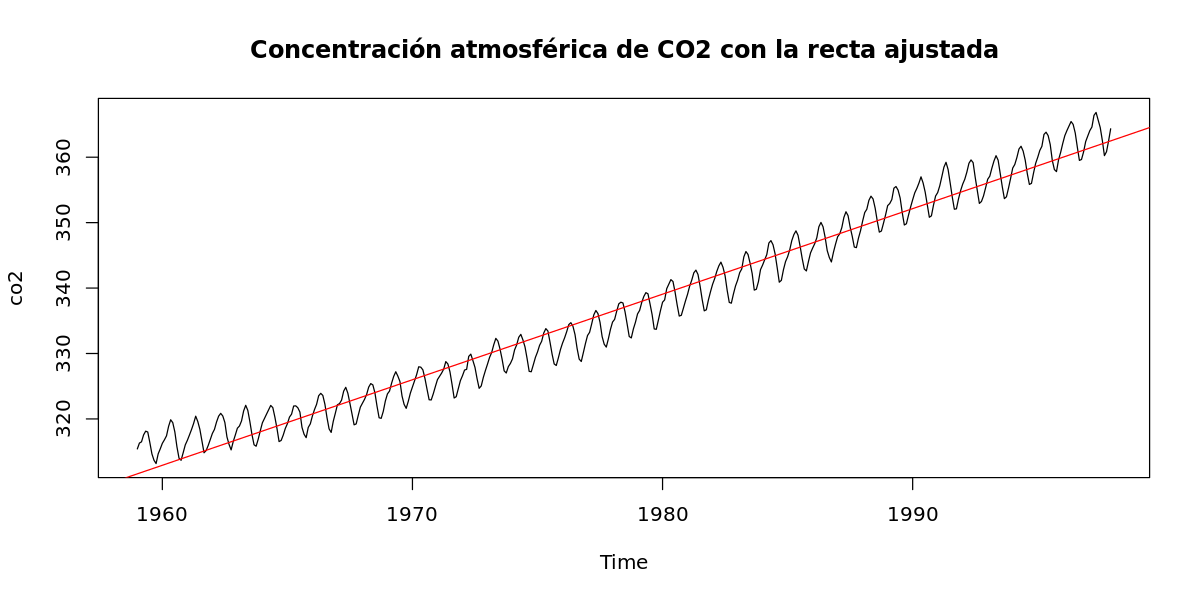

In [32]:
# Podemos graficar nuestra recta de regresión junto con nuestra serie
options(repr.plot.width=10, repr.plot.height=5)
plot(co2, main='Concentración atmosférica de CO2 con la recta ajustada')
abline(co2_reg,col="red")

### Pregunta 1.1

Asumiendo que el modelo es apropiado, en cuánto aumenta el nivel medio de CO2 tras un año?

El nivel medio de CO2 tras un mes aumentará en 1.307497 (ppm), que esta representado por la mediente de la regresión lineal ajustada.

## Ejercicio 1.2

Analice la validez del modelo de regresión lineal

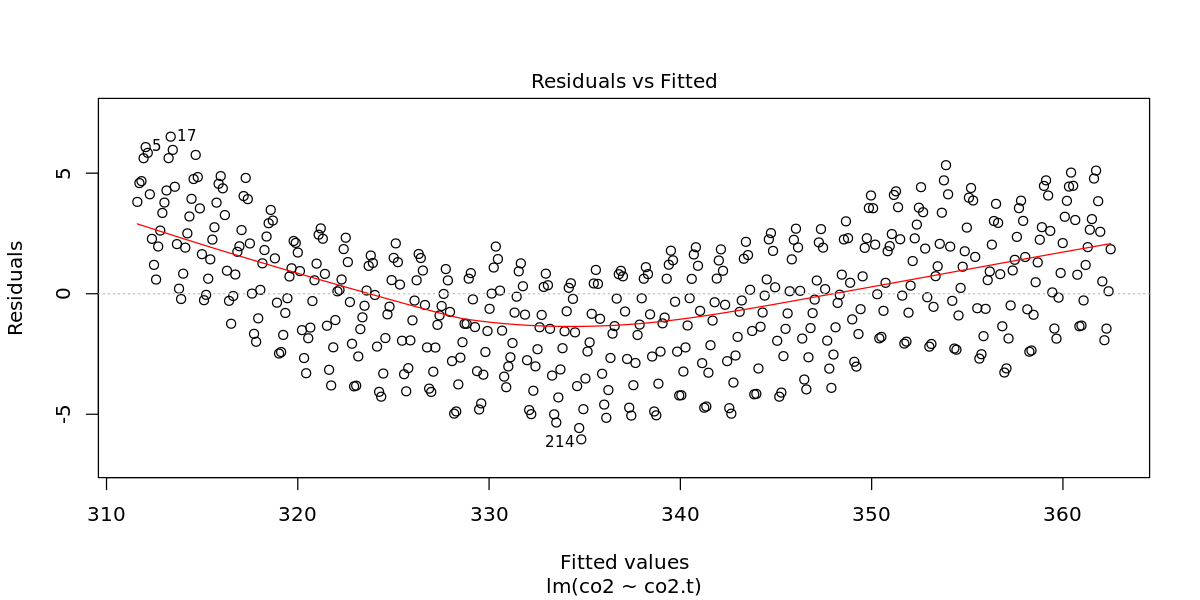

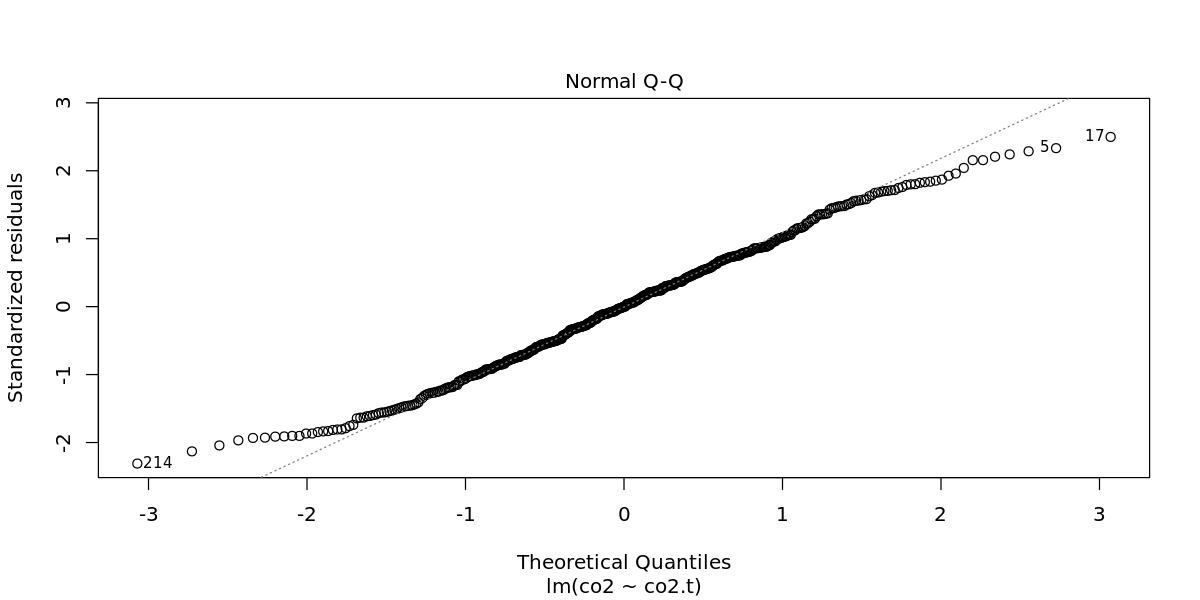

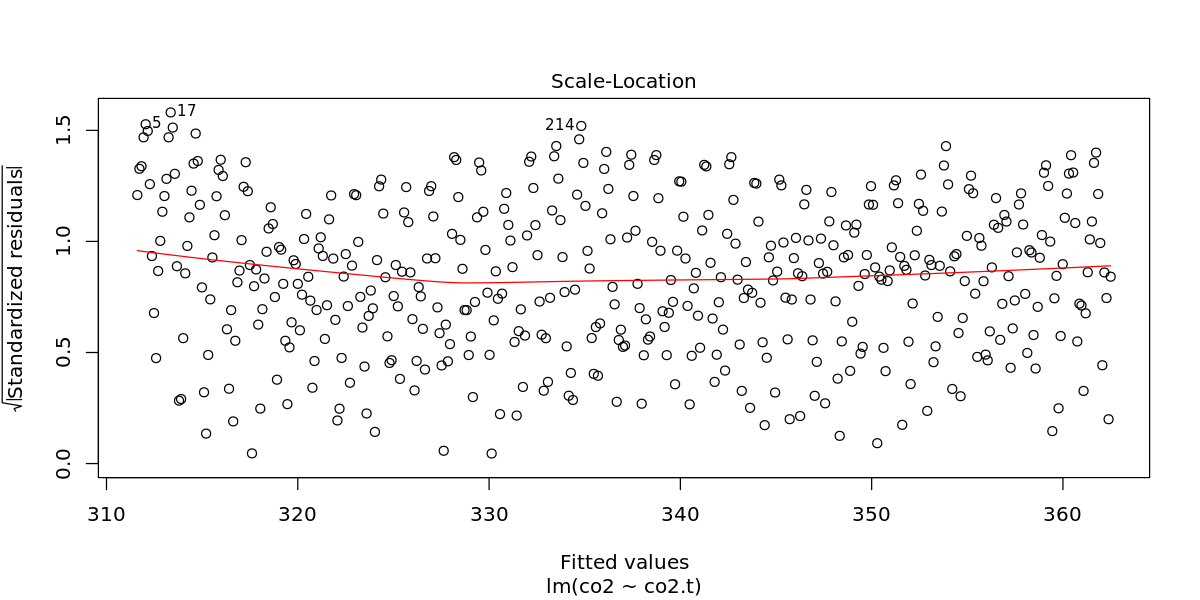

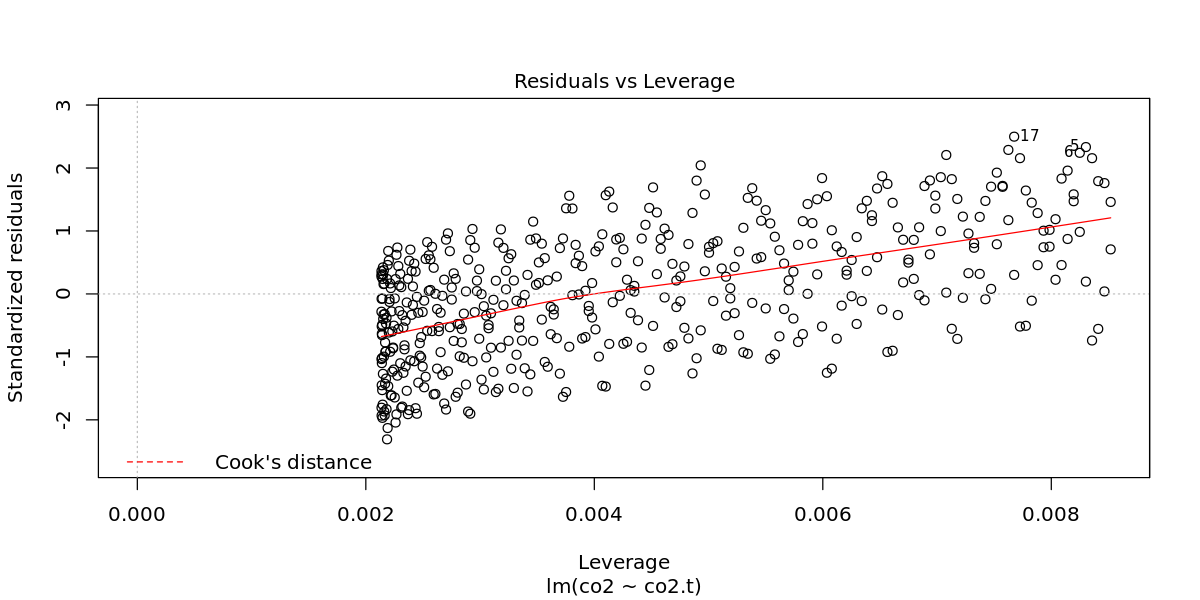

In [33]:
# Examinemos los residuales
co2_Residual = resid(co2_reg)
plot(co2_reg)

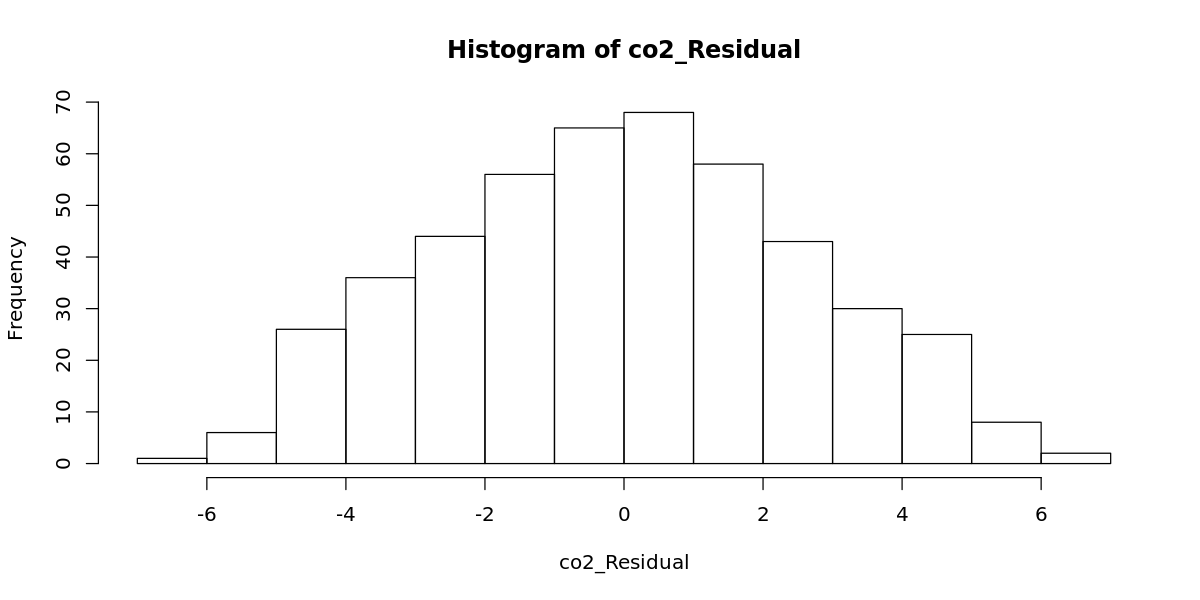

In [34]:
hist(co2_Residual)

### Pregunta 1.2

Analizando el comportamiento de los residuales en el tiempo, es posible verificar la validez de los supuestos del modelo?


Gráficando los residuales podemos concluir que estos residuaes podrían tener autocorrelación debido a que están compactos entre sí y presentan algún tipo de tendencia en su comportamiento.

Por lo tanto, podemos concluir que este modelo no cumple con el supuesto de independencia de los residuos a lo largo del tiempo.

## 2.  Auto-Correlación residual

Examinemos más detalladamente el comportamiento observado de los residuales

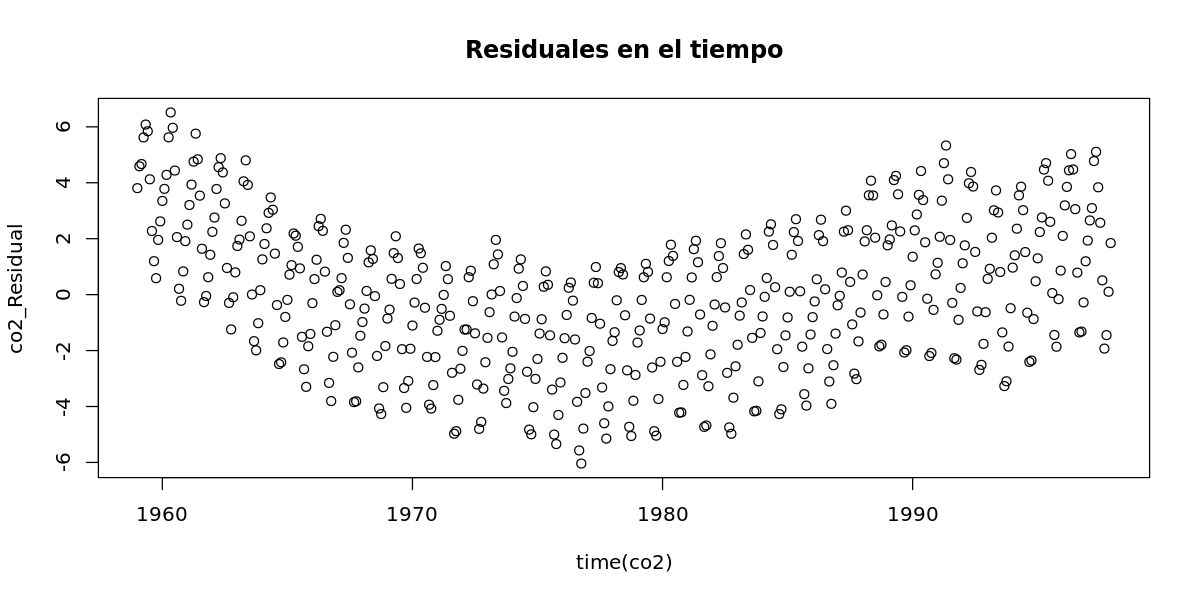

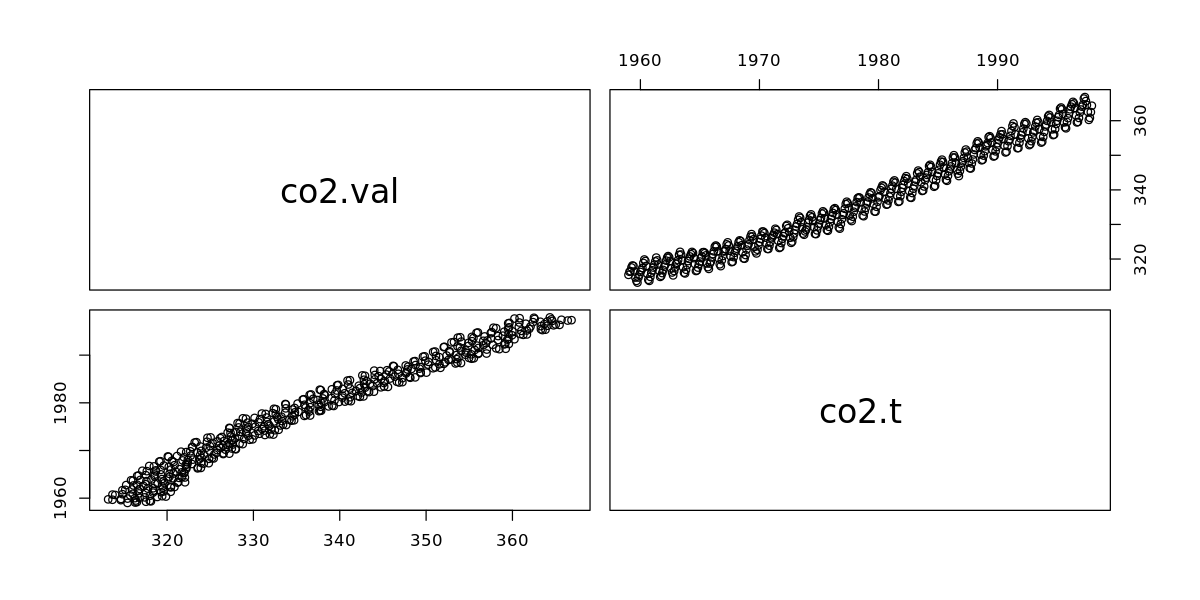

In [35]:
# Visualicemos los residuales para toda la muestra
plot(co2_Residual ~ time(co2), main="Residuales en el tiempo")
pairs(co2.val~co2.t)

### Pregunta 

Qué puede decir sobre la dependencia residual en el tiempo?

Podemos concluir que los residuos de este modelo no están distribuidos aleatoriamente sobre cero, esto demuestra que podría existir una dependencia residual a medida que avanza el tiempo. Esto genera que la matriz de covarianza y varianza no sea confiable y por ende el valor de los estimadores tampoco ya que esos serán sesgados. Esto a su vez genera que las pruebas sobre el modelo (f y t) presenten invalidez.

## Ejercicio 2.1

Concluya a partir de la evidencia si existe auto-correlación residual.

Para validar si efectivamente existe correlación entre los residuales realizaremos la prueba de Durbin Watson

In [36]:
library(lmtest)
dwtest(co2_reg)


	Durbin-Watson test

data:  co2_reg
DW = 0.21236, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


Se rechaza la hipótesis nula, el coeficiente de correlación es mayor a 0.

También podemos visualizar gráficamente la auto-correlación residual sobre más rezagos además del 𝐴𝑅(1). Para ellos podemos ver el correlograma para la auto-correlacion y la auto-correlación parcial:


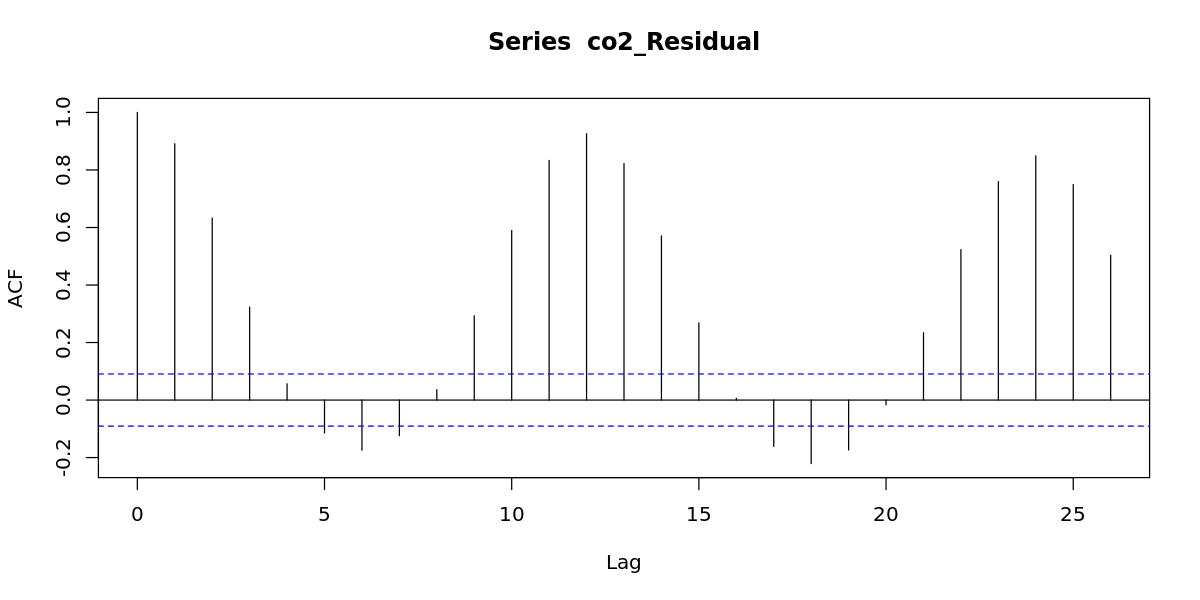

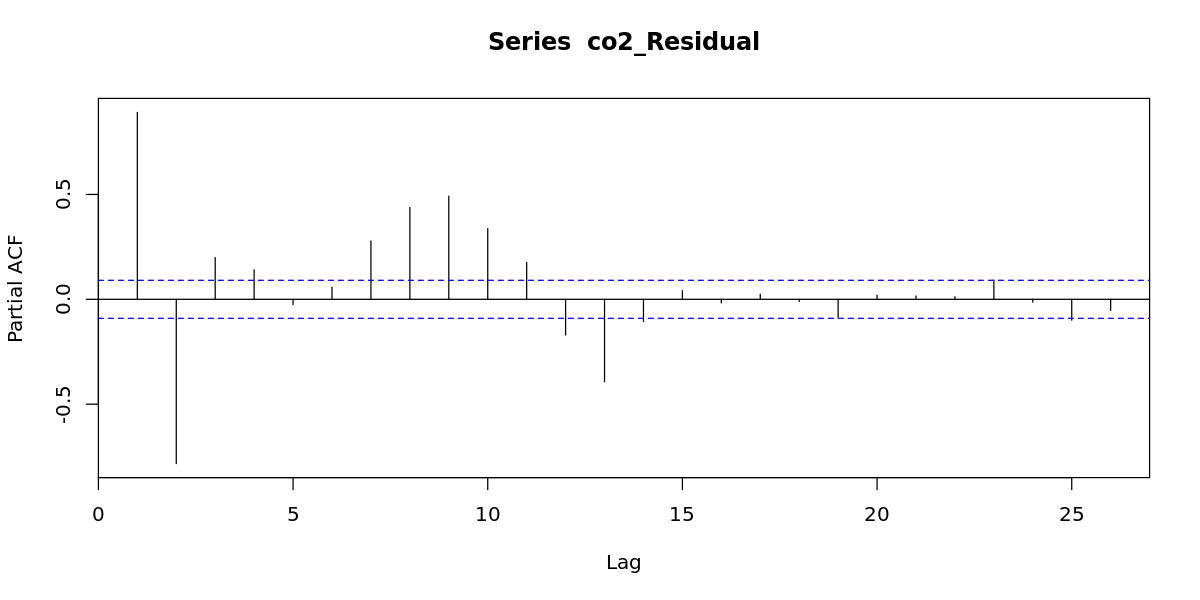

In [37]:
acf(co2_Residual)
pacf(co2_Residual)

## 3. Alternativas para el modelo de regresión

Una manera muy sencilla de inducir cierta *estacionariedad* en la serie consiste en utilizar un modelo estacionario con respecto a la tendencia. Este modelo se puede escribir como 
$$
x_t = \mu_t + y_t
$$
donde $x_t$ es la serie original, $\mu_t$ dentoa la tendencia y $y_t$ representa el proceso aleatorio estacionario. Entonces una primera alternativa puede ser la de remover la tendencia, explorando el análisis de la serie de tiempo.

Para ello, necesitamos una estimación de la tendencia $\hat \mu_t$, y luego trabajamos sobre sus residuales:

$$
y_t = x_t-\hat\mu_t
$$


## Ejercicio 3.1

Proponga una alternativa para ajustar un modelo libre del problema de auto-correlacion residual

In [26]:
#método de Prais-Winsten
#transformación de datos
DW=0.21236
p=1-DW/2
#Y transformado
yt <- c()
#Columna 1 de matriz de x transformado (intercepto)
xt1 <- c()
#Columna 2 de matriz de x transformado (pendiente)
xt2 <- c()

yt[1]=co2.val[1]*(1-p^2)^(1/2)
for (i in 2:length(co2.val)){
    yt[i]=co2.val[i]-p*co2.val[i-1]
}

for (i in 1:length(co2.t)){
    if (i<=1){
        xt1[i]=(1-p^2)^(1/2)*1
        xt2[i]=(1-p^2)^(1/2)*co2.t[i]
    }
    else{
        xt1[i]=1-p*1
        xt2[i]=co2.t[i]-p*co2.t[i-1]
    }
}
#Matriz X
matX <- cbind(xt1,xt2)

#cálculo de estimadores
install.packages("expm")
library(expm)
B <- solve(t(matX)%*%matX)%*%(t(matX)%*%yt)

#errores
errores <- yt-matX%*%B
#suma de errores al cuadrado
sumErroresCuad <- sum(errores^2)
#errores menos el error anterior al cuadrado(et-et-1)^2
etant <- c()
for (i in 1:length(errores)-1){
    etant[i]=(errores[i+1]-errores[i])^2
}
#suma de los errores menos el error anterior al cuadrado
sumErroresAnt <- sum(etant)
nuevoDW=sumErroresAnt/sumErroresCuad

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [27]:
nuevoDW

[1] 0.5642141